# <span style="color:darkblue"> Compare Top Three Team Performance in Formula 1 in last 8 years </span>

(Section 3) Group member: Yunnie Yu, Doris Fang, Ran Chao, Yijia Sui

## <span style="color:darkblue"> Introduction

Formula 1 is a global motorsport competition that has been running since 1950. It is known for its high-speed races, 
advanced engineering, and the skill of its drivers. In this project, we are interested in understanding how the performance of Formula 1 teams in recent years. We will use the Formula 1 dataset to analyze team performance matrics including points earned. By analyzing data, we hope to gain insights how team performances evovled over time.

The structure of this project will be divided into several sections: We will starting by exploring the data, merging some of the datasets, and cleaning it to prepare for analysis. Then, we will perform descriptive analysis to gain a understanding of team performance over time. Finally, we will perform more advanced analysis, including statistical analysis, to gain deeper insights. 



## <span style="color:darkblue"> Data Description

### <span style="color:darkblue"> Dataset Tables Description

For this project, we will use F1 datasets from 1950 to 2023. These datasets provide information on different entities in the competition. We will focus on three datasets: results.csv, races.csv, and constructors.csv. We have selected these datasets to analyze the performance evolution of different teams. Specifically, we will examine the top three teams in each year from 2015 to 2022 by ranking their average points. To accomplish this, we need to use the "points" column from the results.csv, the "year" column from races.csv, and the "constructorRef" column from constructors.csv.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# import the data
races = pd.read_csv("data_raw/races.csv")
results = pd.read_csv("data_raw/results.csv")
constructors = pd.read_csv("data_raw/constructors.csv")

# calculations for overviewing
# calculate the length of rows in each dataset
len(races)
len(results)
len(constructors)

211

### <span style="color:darkblue"> Data Merging Procedures

The first thing we will do is to merge the dataset for further data cleaning and analysis. We merge results and races datatsets on the raceId columns by using inner join. Then, we merge it to constructor dataset on constructorId column by using inner join, too. Therefore, we get our big dataset, which named "data1". (change the name) (just merge some of the variables)

In [4]:
# merge results and races
results_races = pd.merge(results,
                       races,
                       on = "raceId", # key point
                       how = "inner") # only returns rows that have matching values in both tables

# merge results and constructors
data1 = pd.merge(results_races,
                       constructors,
                       on = "constructorId", # key points
                       how = "inner") # only returns rows that have matching values in both tables

data = data1[["year", "name_y", "points"]] # merge the three columns that we will use

### <span style="color:darkblue"> Data Cleaning Procedures

In [7]:
# First we use 'dtypes' to check the data type of data1 dataset and want to know type of each column.

data.dtypes 
# change the column name into constructor for better understanding
data = data.rename(columns={'name_y': 'constructors'}) 

In [9]:
# Second, base on our topic, we want to analyze the performance of each team. 
# So we check the type of team name in column "connstructor Ref"
# We use the describe() method to check the basic information of "constructorRef" column 
# Additionally, we use the code dropna() method with the inplace=True parameter to drop any missing values in the "constructorRef" column. 

print(data["constructors"].describe())
data["constructors"].dropna(inplace=True)

count       25840
unique        210
top       Ferrari
freq         2347
Name: constructors, dtype: object


In [10]:
# Base on our topic, we want to analyze the performance of team throughout the time period
# So we want to check the datatype of "year" and variable in this column
# We find that there are 73 different year, and datatype is already integer
# So we do not need to do extra datacleaning process for "year"

data['year'].value_counts(dropna=False)
data["points"].dropna(inplace=True)

In [11]:
# Base on our topic, we want to analyze the performance of team throughout the time period
# So we want to check the datatype of "points" and variable in this column
# We find datatype is already integer and with two decimal places
# So we do not need to do extra datacleaning process for "points"
# There is no "NA" missing vaule, but it has 18130 nonmeaningful vaules, we will exclude them in the analysis.

print(data['points'].value_counts(dropna=False))

data["points"].dropna(inplace=True)
data['points'].describe()


0.00     18130
2.00      1079
4.00      1067
6.00      1048
1.00      1022
3.00       823
10.00      569
9.00       442
8.00       430
12.00      251
15.00      249
18.00      240
25.00      232
5.00       134
26.00       25
19.00       17
1.50        17
7.00        13
16.00        9
13.00        7
11.00        6
0.50         6
4.50         4
1.33         3
8.50         2
6.50         2
36.00        1
12.50        1
50.00        1
3.14         1
3.50         1
4.14         1
2.50         1
24.00        1
30.00        1
20.00        1
6.14         1
8.14         1
7.50         1
Name: points, dtype: int64


count    25840.000000
mean         1.877053
std          4.169849
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         50.000000
Name: points, dtype: float64

### <span style="color:blue"> Main Columns Descriptions

The main columns of interest in our merged dataset are the "points" and "year" columns. The "points" column represents the number of points awarded to each team for each race, based on the finishing positions of their drivers. The "year" column represents the year in which each race took place.
(description of numbers ?)- average is XXX< std is xxxx>

In [12]:
# filter dataframe to include only points and year columns
df_points_year = data[['points', 'year']].query('(year >=2015) ')

# group data by year and calculate summary statistics for points column
stats_by_year = df_points_year.groupby('year')['points'].agg([np.mean, np.median, np.min, np.max, np.std])

# print table of descriptive statistics for points column by year
print(stats_by_year)

          mean  median  amin  amax       std
year                                        
2015  5.076720    1.00   0.0  25.0  7.191724
2016  4.590909    0.00   0.0  25.0  6.998866
2017  5.050000    0.50   0.0  25.0  7.181674
2018  5.050000    0.50   0.0  25.0  7.181245
2019  5.095238    0.50   0.0  26.0  7.259623
2020  5.100000    0.50   0.0  26.0  7.257302
2021  4.976136    0.25   0.0  26.0  7.154415
2022  5.095455    0.50   0.0  26.0  7.263663


## <span style="color:darkblue"> Process & Results

To carry out the first part of our analysis, we gathered data on the mean points scored by all teams from 2015 to 2022 in the Formula 1 World Championship. We then calculated the mean points for each team over the period and ranked them accordingly. Our findings indicate that the top three teams in terms of mean points during this period were Mercedes, Red Bull, and Ferrari.



In [14]:
point_total =(data. query ('(points >= 10) & (year >=2015)').groupby(["constructors"])
            .agg(mean_points = ('points','mean'))
                 .sort_values(by='mean_points',ascending =False))


display(point_total)



,mean_points
constructors,
Mercedes,18.650735
Red Bull,16.296392
Ferrari,15.102941
Lotus F1,15.000000
Aston Martin,14.000000
Racing Point,13.909091
Toro Rosso,13.500000
AlphaTauri,12.900000
Alpine F1 Team,12.600000


After identifying the top teams, we wanted to analyze their performance in more detail. To achieve this, we utilized a multi-level bar chart to visualize their points scored from 2015 to 2022. The chart displays the performance of the three teams side by side, allowing us to compare their progress over time.

mean_points
constructors year             
Red Bull     2022    20.264706
Ferrari      2022    16.100000
Mercedes     2022    14.000000
Red Bull     2021    18.145161
Ferrari      2021    12.687500
Mercedes     2021    18.516129
             2020    20.555556
Red Bull     2020    16.470588
Ferrari      2020    13.428571
Red Bull     2019    14.208333
Mercedes     2019    19.648649
Ferrari      2019    15.030303
Mercedes     2018    17.432432
Red Bull     2018    15.115385
Ferrari      2018    16.454545
Mercedes     2017    18.111111
Red Bull     2017    14.360000
Ferrari      2017    15.937500
             2016    13.307692
Mercedes     2016    20.351351
Red Bull     2016    15.000000
Mercedes     2015    20.939394
Red Bull     2015    13.000000
Ferrari      2015    15.037037

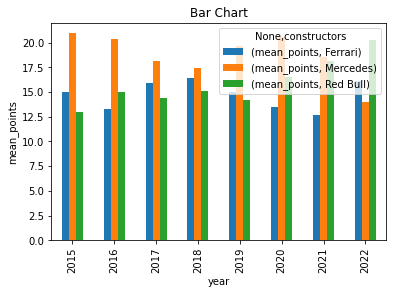

In [15]:
point_agg = (data. query ('(points >= 10) & (constructors in ["Ferrari","Mercedes","Red Bull"])& (year >=2015) ').groupby(["constructors", 'year'])
            .agg(mean_points = ('points','mean'))
                 .sort_values(by='year',ascending =False))

df= pd.DataFrame(point_agg, columns=["mean_points"])
display(df)
df.unstack("constructors").plot(kind = "bar",stacked = False)
plt.title("Bar Chart")
plt.ylabel("mean_points")

plt.show()

Upon examining the chart, we noticed that Red Bull's performance stands out compared to Mercedes and Ferrari. While all three teams have experienced their ups and downs over the years, Red Bull's chart consistently shows an upward trend from 2015 to 2022, suggesting that they have made significant improvements and advancements in their performance over time. On the other hand, Mercedes and Ferrari's charts show a more inconsistent trend, with fluctuations in their performance from year to year. While both teams have had successful seasons, their overall progress seems to be less consistent compared to Red Bull's upward trend.



In [16]:
# filter dataframe to include only points and team name columns
df_points_year = df[['mean_points']]

# group data by team and calculate summary statistics for points column
stats_by_team = df.groupby('constructors')['mean_points'].agg([np.mean, np.median, np.min, np.max, np.std])

# print table of descriptive statistics for points column by team
print(stats_by_team)


                   mean     median     amin       amax       std
constructors                                                    
Ferrari       14.747894  15.033670  12.6875  16.454545  1.433247
Mercedes      18.694328  19.082389  14.0000  20.939394  2.272882
Red Bull      15.820522  15.057692  13.0000  20.264706  2.373527


We then took a further step in investigating Red Bull's increasing trend. In addition to the multi-level bar chart, we have also created a line chart that specifically shows Red Bull's mean points record from 2015 to 2022. This chart provides a more detailed view of Red Bull's performance over the years and allows us to observe their progress more closely.

mean_points
constructors year             
Red Bull     2015    13.000000
             2016    15.000000
             2017    14.360000
             2018    15.115385
             2019    14.208333
             2020    16.470588
             2021    18.145161
             2022    20.264706

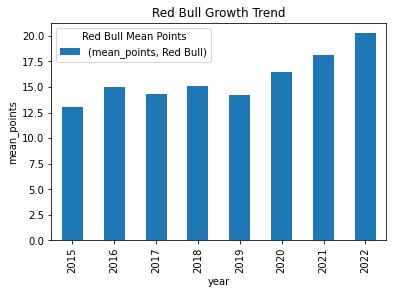

In [17]:
redbull1 = (data. query ('(points >= 10) & (constructors in ["Red Bull"])& (year >=2015) ').groupby([ "constructors",'year'])
            .agg(mean_points = ('points','mean'))
                 )

df1= pd.DataFrame(redbull1, columns=["mean_points"])
display(df1)
df1.unstack("constructors").plot(kind = "bar",stacked = False)
plt.title("Red Bull Growth Trend")
plt.ylabel("mean_points")
plt.legend(title  = "Red Bull Mean Points")
plt.show()


Upon analyzing the Bar chart, we can see that Red Bull's mean points have steadily increased over the years, with a steady growing trend in 2019, 2020, 2021 and 2022. This upward trend is consistent with what we observed in the multi-level bar chart, further emphasizing the team's consistent improvement in performance over time. We then want to formulate a linear regreassion model to better track its evelovment overtime

0.8571840357144087
1.9843691999993915


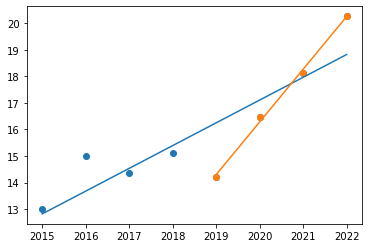

In [23]:
x = np.array([2015, 2016, 2017, 2018, 2019,2020, 2021, 2022])
y = np.array([13.000000, 15.000000, 14.360000, 15.115385, 14.208333, 16.470588, 18.145161, 20.264706])

#find line of best fit
a, b = np.polyfit(x, y, 1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b) 
print(a)

x1 = np.array([2019, 2020, 2021, 2022])
y1 = np.array([14.208333, 16.470588, 18.145161, 20.264706])

#find line of best fit from 2019 to 2022
a1, b1 = np.polyfit(x1, y1, 1)

#add points to plot
plt.scatter(x1, y1)

#add line of best fit to this specific trend
plt.plot(x1, a1*x1+b1) 
print(a1)


## <span style="color:darkblue"> Discussion

Upon examining the chart, we noticed that Red Bull's performance stands out compared to Mercedes and Ferrari. While all three teams have experienced their ups and downs over the years, Red Bull's chart consistently shows an upward trend from 2015 to 2022, suggesting that they have made significant improvements and advancements in their performance over time.

On the other hand, Mercedes and Ferrari's charts show a more inconsistent trend, with fluctuations in their performance from year to year. While both teams have had successful seasons, their overall progress seems to be less consistent compared to Red Bull's upward trend.

This analysis highlights the importance of consistent performance in the world of Formula 1, as seen in Red Bull's progression over the years. It also emphasizes the significance of utilizing data visualization tools like multi-level bar charts to gain insights and make informed decisions based on data-driven analysis. Overall, this analysis provides valuable insights into the performance of the top teams in the Formula 1 World Championship from 2015 to 2022.